# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [42]:
# Read the dataset

df = pd.read_csv("C:\\Users\\anshumans\\Downloads\\breast-cancer-wisconsin-data.csv")
df.head(5)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [43]:
# Id columns is to identify rows hence can be skipped in analysis
# All columns have numerical values
# Class would be the target variable. Should be removed when PCA is done


In [44]:
df_id = df['ID']
df = df.drop('ID', axis=1)
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [45]:
#df_class = df['Class']
#df = df.drop('Class', axis=1)
#df.head()

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [46]:
df.shape

(699, 10)

In [47]:
df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [48]:
df.describe

<bound method NDFrame.describe of      ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0                 5          1           1                  1   
1                 5          4           4                  5   
2                 3          1           1                  1   
3                 6          8           8                  1   
4                 4          1           1                  3   
5                 8         10          10                  8   
6                 1          1           1                  1   
7                 2          1           2                  1   
8                 2          1           1                  1   
9                 4          2           1                  1   
10                1          1           1                  1   
11                2          1           1                  1   
12                5          3           3                  3   
13                1          1           1              

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [49]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [50]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df = df.replace('?', np.nan)
df = df.apply(lambda x: x.fillna(x.median()),axis=0)

df['Bare Nuclei']


0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

In [51]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [52]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis = 0)
imputer = imputer.fit(df[:])
df[:] = imputer.transform(df[:])
df = pd.DataFrame(df)
print(df)

     ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0               5.0        1.0         1.0                1.0   
1               5.0        4.0         4.0                5.0   
2               3.0        1.0         1.0                1.0   
3               6.0        8.0         8.0                1.0   
4               4.0        1.0         1.0                3.0   
5               8.0       10.0        10.0                8.0   
6               1.0        1.0         1.0                1.0   
7               2.0        1.0         2.0                1.0   
8               2.0        1.0         1.0                1.0   
9               4.0        2.0         1.0                1.0   
10              1.0        1.0         1.0                1.0   
11              2.0        1.0         1.0                1.0   
12              5.0        3.0         3.0                3.0   
13              1.0        1.0         1.0                1.0   
14              8.0      

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [53]:
df.dtypes

ClumpThickness                 float64
Cell Size                      float64
Cell Shape                     float64
Marginal Adhesion              float64
Single Epithelial Cell Size    float64
Bare Nuclei                    float64
Normal Nucleoli                float64
Bland Chromatin                float64
Mitoses                        float64
Class                          float64
dtype: object

In [54]:
# Check for correlation of variable

In [55]:
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [56]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

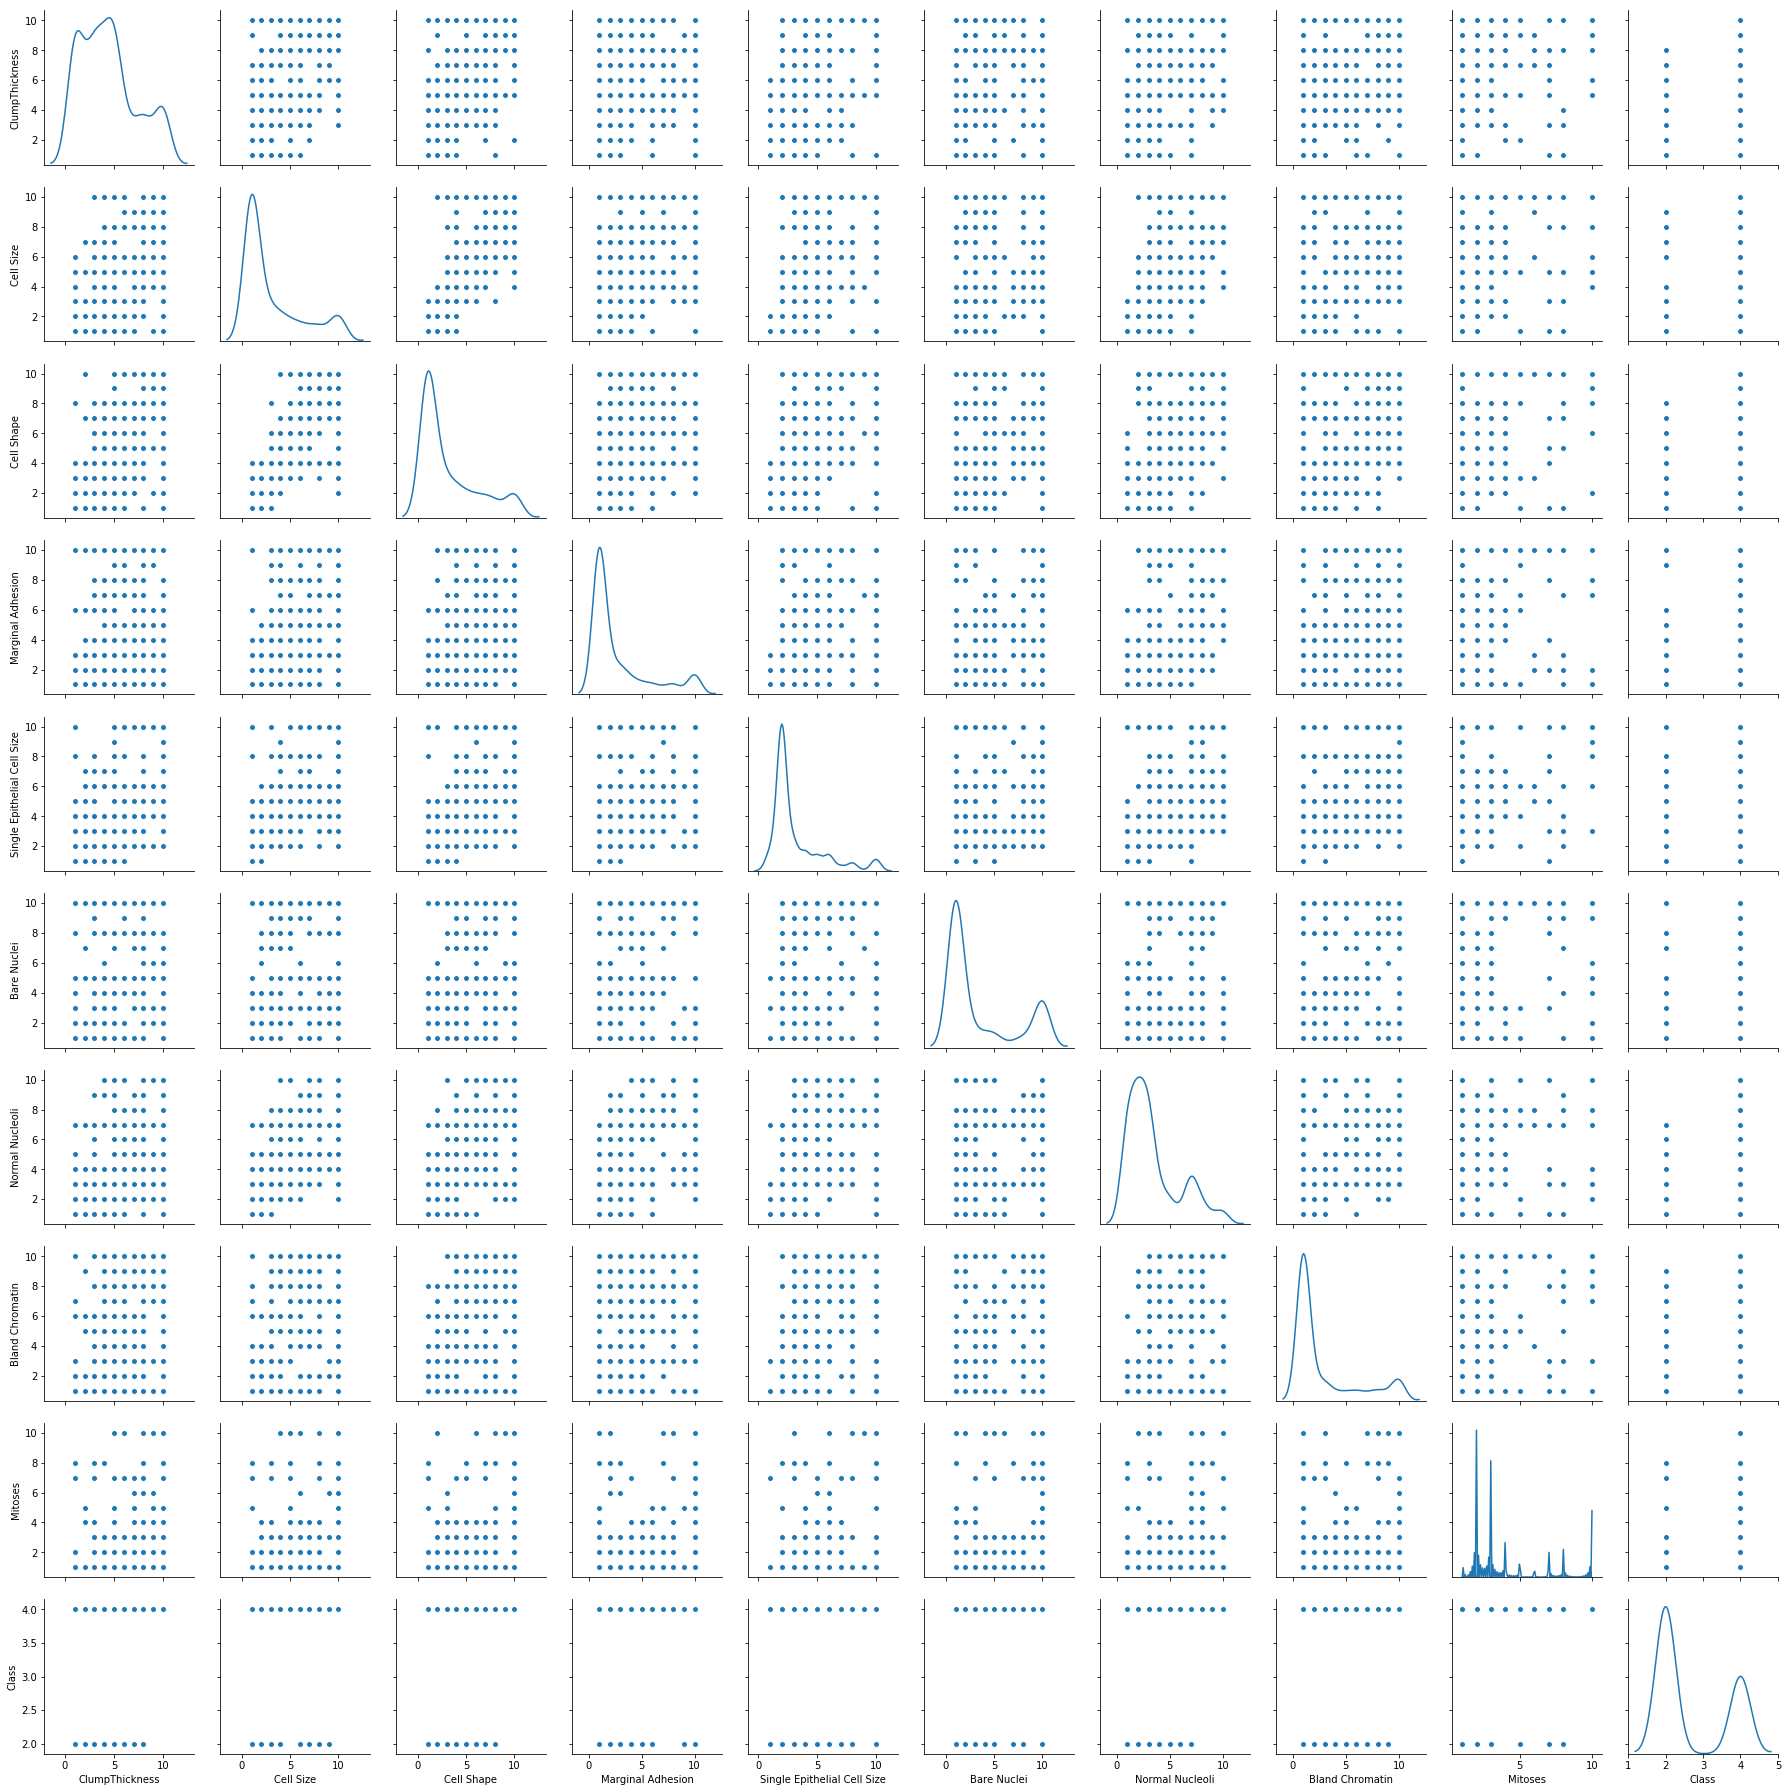

In [57]:
#Let us check for pair plots
sns.pairplot(df, diag_kind = 'kde')

In [58]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [59]:
# We could see most of the outliers are now removed.

In [60]:
#df.boxplot(df)

# Q6 Create a covariance matrix for identifying Principal components

In [61]:
# PCA
# Step 1 - Create covariance matrix
X = df.iloc[:,0:8].values
y = df.iloc[:,9].values
print(X)



[[ 5.  1.  1. ...  1.  3.  1.]
 [ 5.  4.  4. ... 10.  3.  2.]
 [ 3.  1.  1. ...  2.  3.  1.]
 ...
 [ 5. 10. 10. ...  3.  8. 10.]
 [ 4.  8.  6. ...  4. 10.  6.]
 [ 4.  8.  8. ...  5. 10.  4.]]


In [62]:
print(y)

[2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 4. 4. 2. 2. 4. 2. 4. 4. 2. 4.
 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2. 4. 4. 2. 4. 4. 4. 4. 2. 4. 2.
 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 2. 4. 2. 4. 4. 2. 2. 4.
 2. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 2. 4. 2. 4. 4. 4. 2. 2. 2. 4. 2. 2.
 2. 2. 4. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2.
 2. 2. 4. 2. 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 2. 4. 4. 2. 2. 2. 2. 2. 4. 4.
 2. 2. 2. 2. 2. 4. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 4. 2. 4. 4. 4. 2. 4. 4.
 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 4. 4. 2. 2. 2. 4. 4. 2. 4. 4. 4.
 2. 2. 4. 2. 2. 4. 4. 4. 4. 2. 4. 4. 2. 4. 4. 4. 2. 4. 2. 2. 4. 4. 4. 4.
 2. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 4. 2. 4. 4. 4. 2. 2. 2. 2. 4. 4. 4. 4.
 4. 2. 4. 4. 4. 2. 4. 2. 4. 4. 2. 2. 2. 2. 2. 4. 2. 2. 4. 4. 4. 4. 4. 2.
 4. 4. 2. 2. 4. 4. 2. 4. 2. 2. 2. 4. 4. 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 2.
 4. 2. 2. 2. 4. 4. 2. 2. 4. 2. 2. 4. 2. 2. 4. 2. 4.

In [63]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00179211 0.6325921  0.65157657 0.47939997 0.51832491 0.59172847
  0.56032811 0.52091612]
 [0.6325921  1.00179211 0.90907327 0.70565089 0.74024821 0.68650687
  0.76427089 0.70208161]
 [0.65157657 0.90907327 1.00179211 0.66924716 0.71319109 0.69785485
  0.7412162  0.70079537]
 [0.47939997 0.70565089 0.66924716 1.00179211 0.58760416 0.64469416
  0.64728879 0.59964334]
 [0.51832491 0.74024821 0.71319109 0.58760416 1.00179211 0.58439694
  0.62467713 0.6244413 ]
 [0.59172847 0.68650687 0.69785485 0.64469416 0.58439694 1.00179211
  0.68075962 0.56319479]
 [0.56032811 0.76427089 0.7412162  0.64728879 0.62467713 0.68075962
  1.00179211 0.66512433]
 [0.52091612 0.70208161 0.70079537 0.59964334 0.6244413  0.56319479
  0.66512433 1.00179211]]


# Q7 Identify eigen values and eigen vector

In [64]:
# Step 2- Get eigen values and eigen vector

In [65]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Vectors 
%s [[ 0.31139345 -0.0183122   0.84719531  0.13434977 -0.22845074 -0.0933002
   0.32518732  0.01635746]
 [ 0.39216459 -0.73541568 -0.06101227  0.1265458   0.3047963   0.12916963
  -0.03806784 -0.41785122]
 [ 0.3884227   0.66540202  0.02340523  0.14365268  0.4667277   0.09108851
  -0.08114041 -0.39047206]
 [ 0.33825535  0.06898086 -0.33538299 -0.53498416 -0.16158728  0.01021666
   0.66883402 -0.09263573]
 [ 0.34255408  0.05547923 -0.22195039  0.43612022 -0.3054898   0.6441111
   0.02512115  0.36232821]
 [ 0.34537073 -0.05767594  0.19091793 -0.55809684  0.30805478  0.128975
  -0.37389225  0.52739273]
 [ 0.36191378  0.06379923 -0.09631516 -0.13776058 -0.63207077 -0.25320389
  -0.53719771 -0.29066549]
 [ 0.3410958  -0.02890387 -0.26555568  0.37207693  0.15241078 -0.68599046
   0.0993653   0.41251877]]

 Eigen Values 
%s [5.58030754 0.08811573 0.55502461 0.47794403 0.26367391 0.39175104
 0.34438839 0.31313167]
Eigen Values:


,0,1,2,3,4,5,6,7
0,5.580308,0.088116,0.555025,0.477944,0.263674,0.391751,0.344388,0.313132


# Q8 Find variance and cumulative variance by each eigen vector

In [66]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 69.629061    76.5544575   82.51807034  87.40619825  91.70335217
  95.610496    98.90052373 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

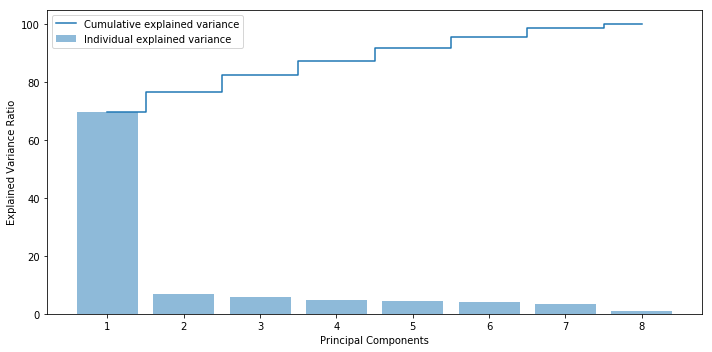

In [67]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

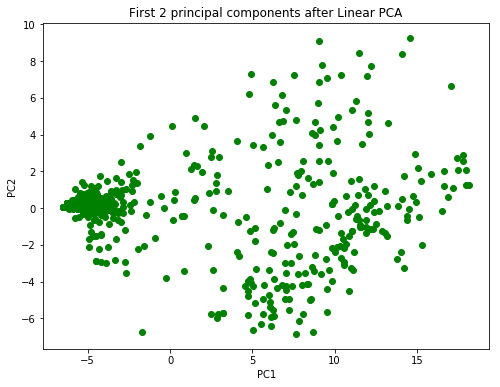

In [68]:
from sklearn.decomposition import PCA
from scipy.stats import zscore


scikit_pca = PCA(n_components=5)

X_spca = scikit_pca.fit_transform(df)
X_spca


scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(df)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[:, 0], X_spca[:, 1], c='green', cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Q10 Find correlation between components and features

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [86]:
# Read the dataset

ratings = pd.read_csv("C:\\Users\\anshumans\\Downloads\\jokes.csv")
ratings.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [87]:
ratings = ratings.iloc[:200,:]
print(ratings)



     NumJokes  Joke1  Joke2  Joke3  Joke4  Joke5  Joke6  Joke7  Joke8  Joke9  \
0          74  -7.82   8.79  -9.66  -8.16  -7.52  -8.50  -9.85   4.17  -8.98   
1         100   4.08  -0.29   6.36   4.37  -2.38  -9.66  -0.73  -5.34   8.88   
2          49  99.00  99.00  99.00  99.00   9.03   9.27   9.03   9.27  99.00   
3          48  99.00   8.35  99.00  99.00   1.80   8.16  -2.82   6.21  99.00   
4          91   8.50   4.61  -4.17  -5.39   1.36   1.60   7.04   4.61  -0.44   
5         100  -6.17  -3.54   0.44  -8.50  -7.09  -4.32  -8.69  -0.87  -6.65   
6          47  99.00  99.00  99.00  99.00   8.59  -9.85   7.72   8.79  99.00   
7         100   6.84   3.16   9.17  -6.21  -8.16  -1.70   9.27   1.41  -5.19   
8         100  -3.79  -3.54  -9.42  -6.89  -8.74  -0.29  -5.29  -8.93  -7.86   
9          72   3.01   5.15   5.15   3.01   6.41   5.15   8.93   2.52   3.01   
10         36  -2.91   4.08  99.00  99.00  -5.73  99.00   2.48  -5.29  99.00   
11        100   1.31   1.80   2.57  -2.3

In [88]:
ratings_numjokes = ratings['NumJokes']
ratings.head()
ratings = ratings.drop('NumJokes', axis=1)
ratings.head()



,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [89]:
ratings.describe()


,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,29.735050,18.908900,34.887650,45.334000,-0.037900,31.020050,0.171500,-0.085300,41.596700,16.734700,...,66.892600,64.030100,63.030850,62.512900,64.436650,64.272550,60.650000,65.928700,61.020000,66.359400
std,45.142111,38.567707,47.374806,50.301999,5.433866,44.822417,5.627576,4.861652,49.136842,36.337965,...,45.950725,47.360876,46.638318,47.343317,46.816578,47.018688,47.682165,46.842527,48.233139,46.213238
min,-9.710000,-9.950000,-9.710000,-9.760000,-9.810000,-9.850000,-9.950000,-9.850000,-9.850000,-9.760000,...,-9.130000,-9.610000,-9.710000,-9.560000,-9.760000,-9.510000,-9.130000,-9.660000,-9.760000,-9.560000
25%,-0.852500,-2.595000,-0.727500,-1.685000,-4.220000,0.630000,-4.480000,-4.270000,-0.452500,-1.750000,...,5.340000,4.360000,5.680000,5.227500,5.680000,3.665000,4.117500,6.392500,2.657500,6.145000
50%,4.220000,3.200000,5.195000,8.035000,0.340000,5.530000,0.850000,0.680000,6.190000,2.720000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
75%,99.000000,8.312500,99.000000,99.000000,4.232500,99.000000,4.685000,3.425000,99.000000,8.122500,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
max,99.000000,99.000000,99.000000,99.000000,9.220000,99.000000,9.270000,9.270000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [90]:
ratings.shape

(200, 100)

In [91]:
ratings.colums = range(0,99)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [98]:

ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


In [93]:
ratings.shape

(199, 100)

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [94]:
ratings.dtypes

Joke1      float64
Joke2      float64
Joke3      float64
Joke4      float64
Joke5      float64
Joke6      float64
Joke7      float64
Joke8      float64
Joke9      float64
Joke10     float64
Joke11     float64
Joke12     float64
Joke13     float64
Joke14     float64
Joke15     float64
Joke16     float64
Joke17     float64
Joke18     float64
Joke19     float64
Joke20     float64
Joke21     float64
Joke22     float64
Joke23     float64
Joke24     float64
Joke25     float64
Joke26     float64
Joke27     float64
Joke28     float64
Joke29     float64
Joke30     float64
            ...   
Joke71     float64
Joke72     float64
Joke73     float64
Joke74     float64
Joke75     float64
Joke76     float64
Joke77     float64
Joke78     float64
Joke79     float64
Joke80     float64
Joke81     float64
Joke82     float64
Joke83     float64
Joke84     float64
Joke85     float64
Joke86     float64
Joke87     float64
Joke88     float64
Joke89     float64
Joke90     float64
Joke91     float64
Joke92     f

In [95]:
ratings = ratings.replace(99.00, 0)
ratings.head()


,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ratings_diff =  scaler.fit_transform(ratings) 

In [154]:
print(ratings_diff)

[[-1.99488279  1.80864669 -2.23852141 ... -0.09246592  0.00398848
  -0.15816806]
 [ 0.8259334  -0.09248732  1.39449923 ...  0.00345576 -1.25884825
   0.15572601]
 [-0.14120358 -0.03176828 -0.04782357 ... -0.09246592  0.00398848
  -0.15816806]
 ...
 [-0.14120358 -0.03176828 -0.04782357 ... -0.09246592  0.00398848
  -0.15816806]
 [-0.14120358 -0.03176828 -0.04782357 ... -0.09246592  0.00398848
  -0.15816806]
 [ 0.43481183  0.52726562 -0.95040922 ... -0.09246592  0.00398848
  -0.15816806]]


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [99]:
mean_ratings = ratings_diff.mean(axis = 0)

In [100]:
print(mean_ratings)

[ 4.46320814e-18  0.00000000e+00 -2.67792488e-17  3.84951702e-17
  2.90108529e-17  4.90952895e-17 -2.67792488e-17  1.33896244e-17
  0.00000000e+00 -1.11580203e-17  1.11580203e-17  1.33896244e-17
  5.35584977e-17  1.06001193e-16  2.23160407e-17  1.69601909e-16
  3.01266549e-17  1.11580203e-18 -1.78528326e-17  0.00000000e+00
 -8.25693506e-17 -3.12424570e-17  1.78528326e-17 -5.57901017e-18
  3.12424570e-17  0.00000000e+00 -7.14113302e-17 -5.80217058e-17
 -1.42822660e-16 -8.92641628e-18  3.57056651e-17 -2.45476448e-17
  8.92641628e-18  1.33896244e-17 -2.67792488e-17 -1.96381158e-16
  3.12424570e-17  0.00000000e+00  3.90530712e-17 -5.57901017e-18
 -8.92641628e-18 -2.67792488e-17 -2.67792488e-17  4.46320814e-17
  2.95687539e-17  3.79372692e-17  0.00000000e+00  2.12002387e-17
 -1.99170663e-16 -1.62349196e-16  3.23582590e-17 -2.67792488e-17
  1.24969828e-16  8.92641628e-18  4.46320814e-18  4.01688733e-17
  1.78528326e-17  3.57056651e-17 -1.89686346e-17  1.78528326e-17
  2.34318427e-17 -8.03377

In [101]:
mean_df = pd.DataFrame(mean_ratings)

In [102]:
print(mean_df)

               0
0   4.463208e-18
1   0.000000e+00
2  -2.677925e-17
3   3.849517e-17
4   2.901085e-17
5   4.909529e-17
6  -2.677925e-17
7   1.338962e-17
8   0.000000e+00
9  -1.115802e-17
10  1.115802e-17
11  1.338962e-17
12  5.355850e-17
13  1.060012e-16
14  2.231604e-17
15  1.696019e-16
16  3.012665e-17
17  1.115802e-18
18 -1.785283e-17
19  0.000000e+00
20 -8.256935e-17
21 -3.124246e-17
22  1.785283e-17
23 -5.579010e-18
24  3.124246e-17
25  0.000000e+00
26 -7.141133e-17
27 -5.802171e-17
28 -1.428227e-16
29 -8.926416e-18
..           ...
70  1.338962e-17
71 -2.677925e-17
72  8.926416e-18
73 -4.463208e-17
74 -1.338962e-17
75 -1.338962e-17
76  3.793727e-17
77  4.909529e-17
78 -4.240048e-17
79 -3.570567e-17
80 -2.231604e-18
81 -2.231604e-17
82  3.124246e-17
83  3.124246e-17
84  1.785283e-17
85  2.677925e-17
86  1.338962e-17
87  0.000000e+00
88 -6.248491e-17
89  8.926416e-18
90  3.570567e-17
91  2.231604e-17
92 -5.355850e-17
93 -3.124246e-17
94 -4.463208e-17
95  2.677925e-17
96  2.677925e-

In [105]:
mean_df.sort_values(by=0, ascending=False).head(10)

,0
15,1.696019e-16
52,1.249698e-16
13,1.060012e-16
67,8.703256e-17
64,5.355850e-17
65,5.355850e-17
12,5.355850e-17
63,5.355850e-17
77,4.909529e-17
5,4.909529e-17
